In [ ]:
!nvidia-smi

Fri Sep  2 16:26:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# Used to build and deploy machine learning apps
import tensorflow as tf

# Deep Learning API for creating Neural Networks (Runs on TensorFlow)
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow import math
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Scikit-learn : machine learning library
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Used for accessing files and file names
import pathlib 
import os

In [ ]:
def display_random_image(dir, class_type):
  img_dir = dir + '/' + class_type
  files = os.listdir(img_dir)
  img_name = random.choice(files)
  img = mpimg.imread(img_dir + '/' + img_name)
  plt.imshow(img)
  plt.title(class_type)
  plt.axis('off')
  print(f"Image shape : {img.shape}")

Image shape : (224, 224, 3)


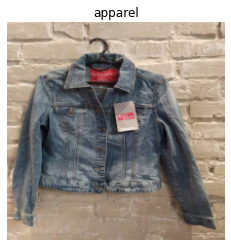

In [ ]:
display_random_image("/content/drive/MyDrive/data/custom_dataset", "apparel")

Image shape : (224, 224, 3)


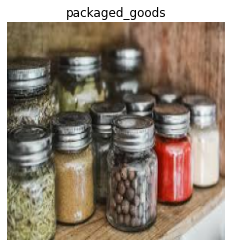

In [ ]:
display_random_image("/content/drive/MyDrive/data/custom_dataset", "packaged_goods")

Image shape : (224, 224, 3)


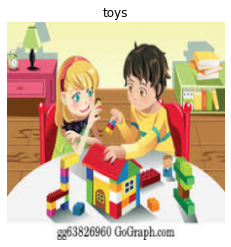

In [ ]:
display_random_image("/content/drive/MyDrive/data/custom_dataset", "toys")

In [ ]:
data_dir = "/content/drive/MyDrive/data/custom_dataset"
# Import data, turn it into batches of 32 with a size of 256x256
# Batch : We loop through batches of 32 images to minimize 
# memory requirements
# Works with PNG, JPG, BMP, PPM, TIF files

training_data = tf.keras.utils.image_dataset_from_directory(data_dir, 
                                            validation_split=0.2,
                                            subset="training",
                                            batch_size=32, #32 is magical number for processing
                                            image_size=(256,256),
                                            label_mode='categorical',
                                            seed=66)

validation_data = tf.keras.utils.image_dataset_from_directory(data_dir, 
                                            validation_split=0.2,
                                            subset="validation",
                                            batch_size=32, 
                                            image_size=(256,256),
                                            label_mode='categorical',
                                            seed=66)

Found 9357 files belonging to 9 classes.
Using 7486 files for training.
Found 9357 files belonging to 9 classes.
Using 1871 files for validation.


In [ ]:
# Normalize pixel values between 0 & 1
# Each pixel is currently values between 0 & 255 for RGB colors
# Neural networks work best with normalized data
# Divide all values by the max value 255
norm_layer = tf.keras.layers.Rescaling(1/255.)

# Apply the division to all data in traing data set
training_data_norm = training_data.map(lambda x, y: (norm_layer(x), y))

# Do same for test (validation) dataset
validation_data_norm = validation_data.map(lambda x, y: (norm_layer(x), y))

In [ ]:
len(training_data_norm), 7486/32

(234, 233.9375)

# **CNN Model**

In [ ]:
model_cnn = Sequential([
    Conv2D(10,3,input_shape=(256,256,3)),
    Activation(activation="relu"),
    Conv2D(10,3),
    Activation(activation="relu"),
    MaxPool2D(),
    Conv2D(10,3),
    Activation(activation="relu"),
    Conv2D(10,3),
    Activation(activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(9),
    Activation(activation="softmax") # 9 output neurons
])

model_cnn.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

hirtory_cnn = model_cnn.fit(training_data_norm,
                            epochs=5,
                            steps_per_epoch=len(training_data_norm),
                            validation_data=validation_data_norm,
                            validation_steps=len(validation_data_norm))

Epoch 1/5
234/234 [==============================] - 1323s 5s/step - loss: 1.5505 - accuracy: 0.4774 - val_loss: 1.3346 - val_accuracy: 0.5537
Epoch 2/5
234/234 [==============================] - 30s 124ms/step - loss: 1.1169 - accuracy: 0.6222 - val_loss: 1.2232 - val_accuracy: 0.6050
Epoch 3/5
234/234 [==============================] - 30s 124ms/step - loss: 0.7701 - accuracy: 0.7471 - val_loss: 1.3426 - val_accuracy: 0.5751
Epoch 4/5
234/234 [==============================] - 30s 124ms/step - loss: 0.4329 - accuracy: 0.8581 - val_loss: 1.6048 - val_accuracy: 0.5917
Epoch 5/5
234/234 [==============================] - 30s 124ms/step - loss: 0.2334 - accuracy: 0.9248 - val_loss: 2.0393 - val_accuracy: 0.5623


In [ ]:
model_cnn.evaluate(validation_data_norm)

59/59 [==============================] - 11s 165ms/step - loss: 2.0393 - accuracy: 0.5623


[2.0392985343933105, 0.5622661709785461]

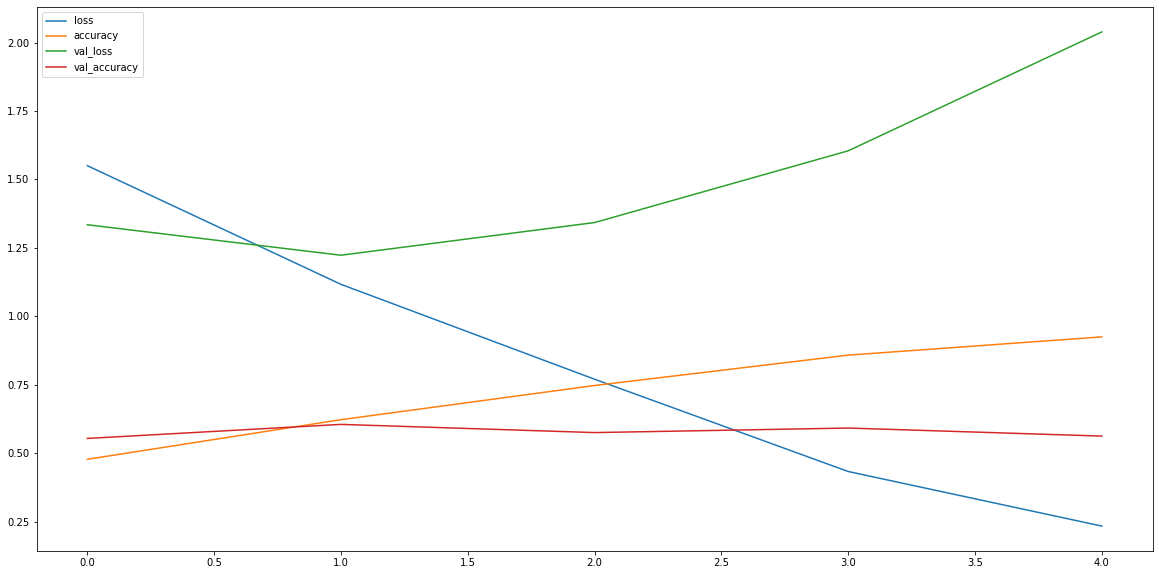

In [ ]:
pd.DataFrame(hirtory_cnn.history).plot(figsize=(20,10))

In [ ]:
data_augmentation = Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2),
])

In [ ]:
model_cnn_aug = Sequential([
    data_augmentation,
    Conv2D(10,3,input_shape=(256,256,3)),
    Activation(activation="relu"),
    Conv2D(10,3),
    Activation(activation="relu"),
    MaxPool2D(),
    Conv2D(10,3),
    Activation(activation="relu"),
    Conv2D(10,3),
    Activation(activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(9),
    Activation(activation="softmax") # 9 output neurons
])

model_cnn_aug.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

history_cnn_aug = model_cnn_aug.fit(training_data_norm,
                            epochs=5,
                            steps_per_epoch=len(training_data_norm),
                            validation_data=validation_data_norm,
                            validation_steps=len(validation_data_norm))

Epoch 1/5
234/234 [==============================] - 32s 125ms/step - loss: 1.6812 - accuracy: 0.4249 - val_loss: 1.5859 - val_accuracy: 0.4693
Epoch 2/5
234/234 [==============================] - 30s 125ms/step - loss: 1.4627 - accuracy: 0.5122 - val_loss: 1.4989 - val_accuracy: 0.4960
Epoch 3/5
234/234 [==============================] - 32s 133ms/step - loss: 1.3775 - accuracy: 0.5347 - val_loss: 1.3863 - val_accuracy: 0.5414
Epoch 4/5
234/234 [==============================] - 30s 125ms/step - loss: 1.2965 - accuracy: 0.5700 - val_loss: 1.3256 - val_accuracy: 0.5697
Epoch 5/5
234/234 [==============================] - 30s 126ms/step - loss: 1.2440 - accuracy: 0.5838 - val_loss: 1.3391 - val_accuracy: 0.5484


In [ ]:
model_cnn_aug.evaluate(validation_data_norm)

59/59 [==============================] - 6s 82ms/step - loss: 1.3391 - accuracy: 0.5484


[1.3391069173812866, 0.5483698844909668]

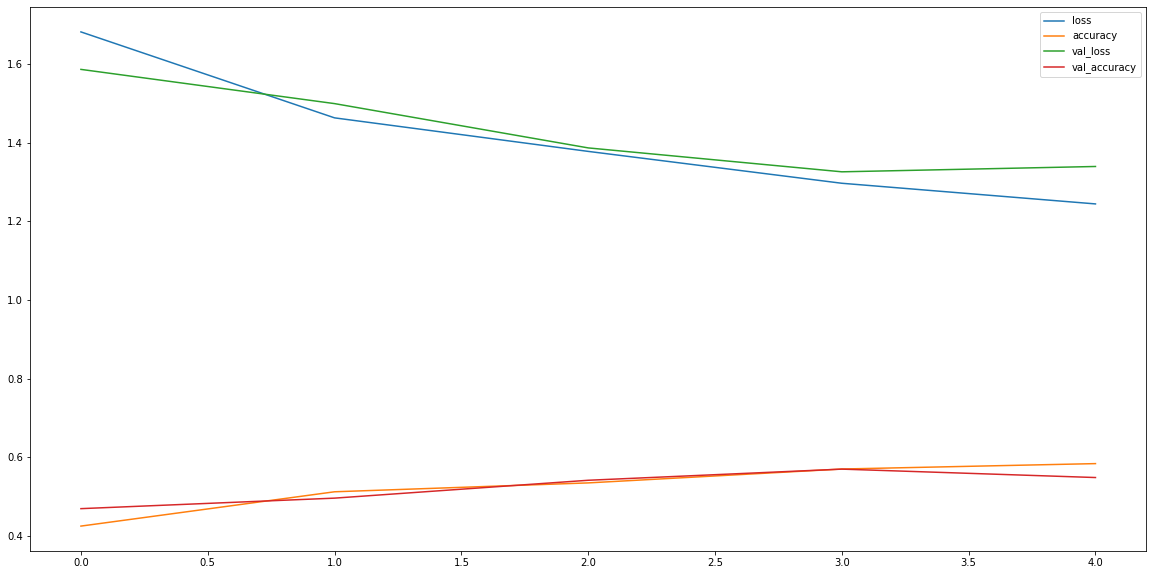

In [ ]:
pd.DataFrame(history_cnn_aug.history).plot(figsize=(20,10))

In [ ]:
# Get class names
class_names = os.listdir("/content/drive/MyDrive/data/custom_dataset")
class_names.sort()
class_names

['apparel',
 'artwork',
 'dishes',
 'furniture',
 'landmarks',
 'others',
 'packaged_goods',
 'storefronts',
 'toys']

In [ ]:
#Normalize and Resize
def normalize_and_resize(img_loc):
  my_img = tf.io.read_file(img_loc) # Read in image
  my_img = tf.image.decode_image(my_img) # Turn file into a tensor
  my_img = tf.image.resize(my_img, size=[256, 256]) # Resize image
  my_img = my_img/255 # Normalize data
  return my_img

In [ ]:
# Make Predictions on Outside Images
# apple_pie = normalize_and_resize("/content/gdrive/MyDrive/data/apple_pie.png")
# # Tells us how likely the image belongs to a class in our model
# prediction = model_cnn_aug.predict(tf.expand_dims(apple_pie, axis=0))
# class_names[np.argmax(prediction)]

In [ ]:
import tensorflow_hub as hub

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
resnet_layer = hub.KerasLayer(resnet_url,
                              trainable=False,
                              input_shape=(256,256,3))
resnet_model = Sequential([
    resnet_layer,
    keras.layers.Dense(9, activation='softmax')
])

In [ ]:
resnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 2048)              23564800  
                                                                 
 dense_4 (Dense)             (None, 9)                 18441     
                                                                 
Total params: 23,583,241
Trainable params: 18,441
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
resnet_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
resnet_history = resnet_model.fit(training_data_norm,
                                  epochs=5,
                                  steps_per_epoch=len(training_data_norm),
                                  validation_data=validation_data_norm)

Epoch 1/5
234/234 [==============================] - 47s 176ms/step - loss: 0.3731 - accuracy: 0.8827 - val_loss: 0.2357 - val_accuracy: 0.9305
Epoch 2/5
234/234 [==============================] - 37s 155ms/step - loss: 0.1345 - accuracy: 0.9589 - val_loss: 0.2003 - val_accuracy: 0.9343
Epoch 3/5
234/234 [==============================] - 37s 155ms/step - loss: 0.0888 - accuracy: 0.9756 - val_loss: 0.1910 - val_accuracy: 0.9369
Epoch 4/5
234/234 [==============================] - 36s 152ms/step - loss: 0.0626 - accuracy: 0.9840 - val_loss: 0.1875 - val_accuracy: 0.9369
Epoch 5/5
234/234 [==============================] - 37s 155ms/step - loss: 0.0452 - accuracy: 0.9924 - val_loss: 0.1912 - val_accuracy: 0.9396


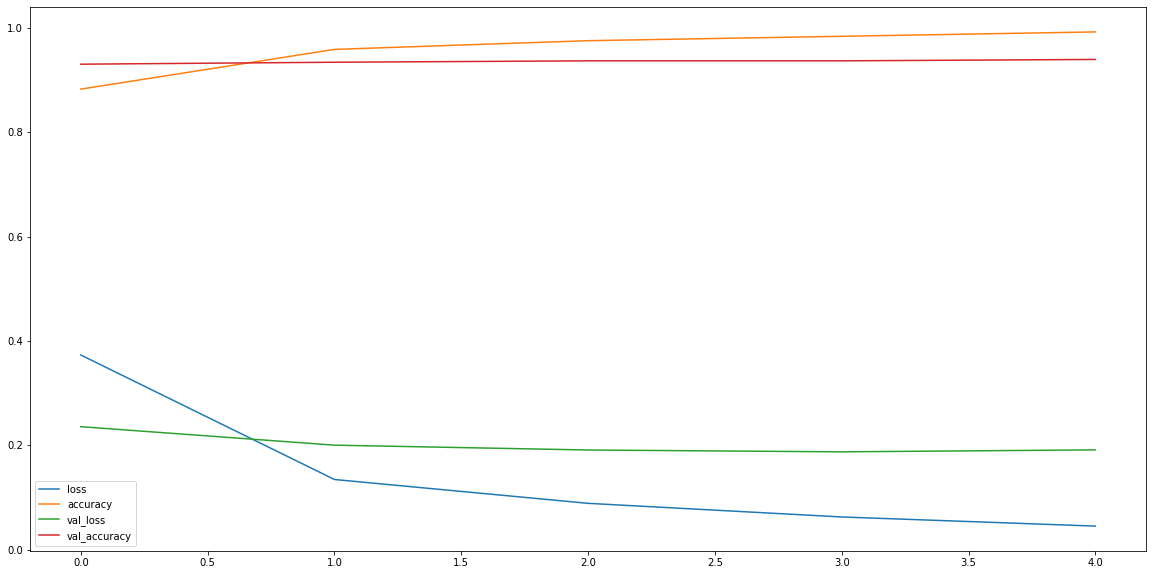

In [ ]:
pd.DataFrame(resnet_history.history).plot(figsize=(20,10))

# **Efficient Feature Model**

In [ ]:
eff_url = "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1"
eff_layer = hub.KerasLayer(eff_url,
                              trainable=False,
                              input_shape=(256,256,3))
eff_model = Sequential([
    eff_layer,
    Dense(9, activation='softmax')
])

In [ ]:
eff_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 2560)              64097680  
                                                                 
 dense_6 (Dense)             (None, 9)                 23049     
                                                                 
Total params: 64,120,729
Trainable params: 23,049
Non-trainable params: 64,097,680
_________________________________________________________________


In [ ]:
eff_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
eff_history = eff_model.fit(training_data_norm,
                                  epochs=5,
                                  steps_per_epoch=len(training_data_norm),
                                  validation_data=validation_data_norm)

Epoch 1/5
234/234 [==============================] - 172s 610ms/step - loss: 0.4792 - accuracy: 0.8946 - val_loss: 0.2630 - val_accuracy: 0.9316
Epoch 2/5
234/234 [==============================] - 138s 586ms/step - loss: 0.1841 - accuracy: 0.9502 - val_loss: 0.2187 - val_accuracy: 0.9391
Epoch 3/5
234/234 [==============================] - 137s 584ms/step - loss: 0.1370 - accuracy: 0.9642 - val_loss: 0.2039 - val_accuracy: 0.9391
Epoch 4/5
234/234 [==============================] - 137s 584ms/step - loss: 0.1099 - accuracy: 0.9727 - val_loss: 0.1965 - val_accuracy: 0.9423
Epoch 5/5
234/234 [==============================] - 137s 584ms/step - loss: 0.0911 - accuracy: 0.9780 - val_loss: 0.1933 - val_accuracy: 0.9428


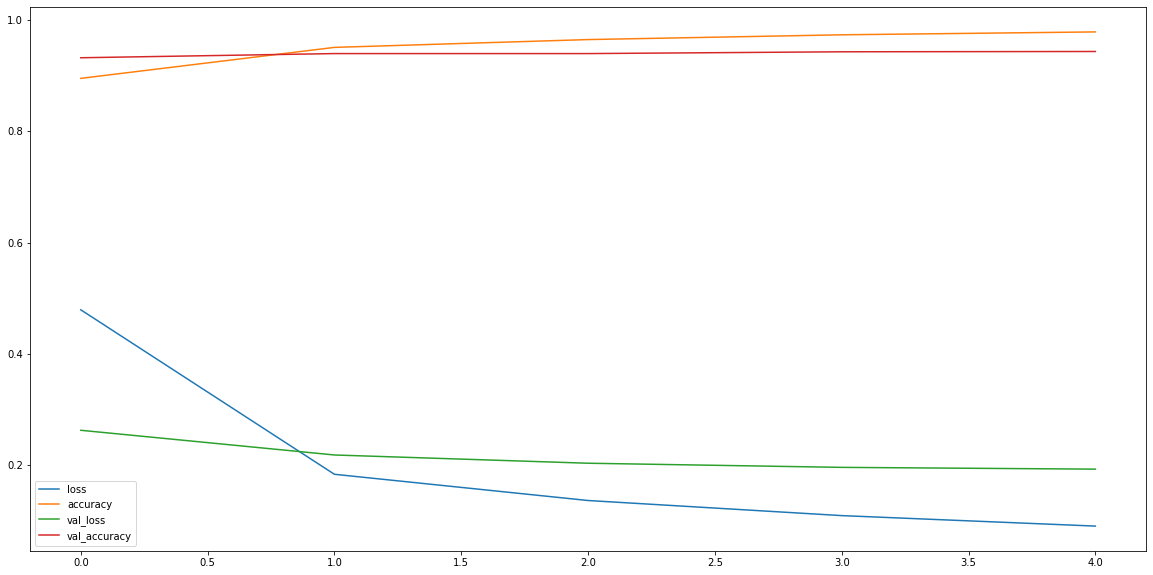

In [ ]:
pd.DataFrame(eff_history.history).plot(figsize=(20,10))